# Ford GoBike System Data

## Abdulwasiu Tiamiyu

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bike.shape)
print('*' *50)
print(bike.info())
print('*' *50)
print(bike.dtypes)
bike.head(5)

(183412, 16)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Check values in eac columns
print(bike.nunique())

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [5]:
# check for null values (%)
bike.isnull().sum()/bike.shape[0]*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

## Data Cleaning

#### Issue #1: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

#### Define: Drop the rows with missing values

#### Code

In [6]:
bike.dropna(inplace=True)

#### Test

In [7]:
bike.isnull().any().sum()

0

#### Issue #2: start_time and end_time columns are in string (object)

#### Define: Convert the columns to datetime

#### Code

In [8]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

#### Test

In [9]:
bike['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

#### Issue #3: bike_id in string (object)

#### Define: Convert the column to string(object)

#### Code

In [10]:
bike['bike_id'] =bike.bike_id.astype(str)

#### Test

In [11]:
type(bike['bike_id'][0])

str

### Data Exploration
Extracting the day, month and year colunns fron the start and end date

In [12]:
import datetime as dt
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)




bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

# bike['start_year'] = bike['start_time'].dt.year
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4


In [13]:
# descriptive statistics for the numeric variable (duration_sec)
bike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

### What is the structure of your dataset?
There were  initially 183,412 rides in the dataset with 16 features which was later dropped to 174952 rides and 21 features after fueature engineering. There are 2 datetime, 7 float, 1 int and 12 categorical(string) variables with no particular order.


### What is/are the main feature(s) of interest in your dataset?
I am most interested in finding out what time of the day, day of the week, month of the year were most trips taken. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I believe the start_date variable will provide me the information needed for this findings because I would be able to extract the day, week, and month columns. I expect most trips to take place in the morning hour, weekdays and holiday months.

## Univariate Exploration

### What is the average trip duration?

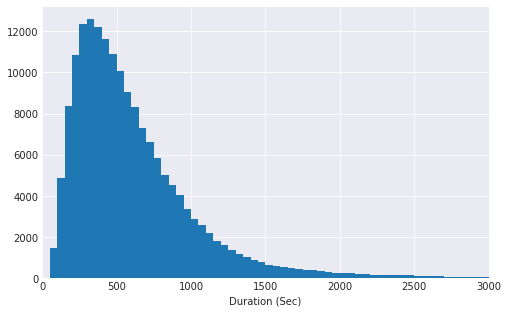

In [14]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(50, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 3000]);

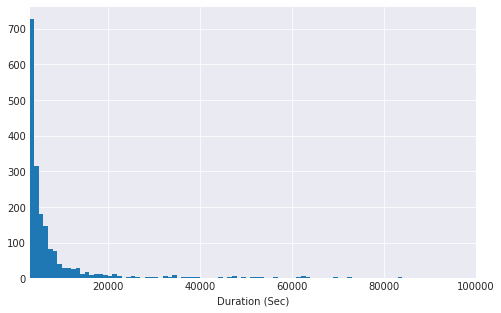

In [15]:
# the tail part of the distribution
binsize = 1000
bins = np.arange(3000, bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([3000, 100000]);

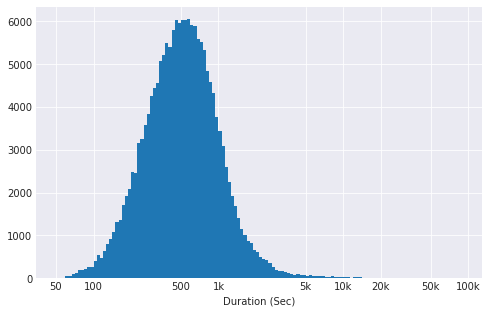

In [16]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins=bins)
plt.xscale('log')
# plt.xlim([0,3000])
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

Duration has a long-tailed distribution, with a lot of trips on the short duration end (200 - 1000 secs) and few on the long duration end. It has a peak at around 500 secs and a smooth fall till arounf 10k secs. There are fewer longer durations afterwards with spaces in between.

## How many trips in a week?


In [17]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

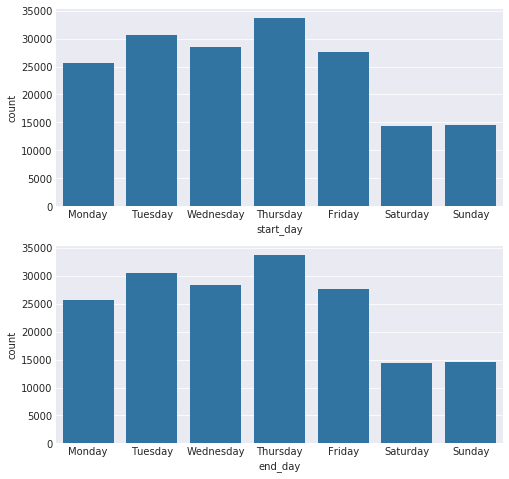

In [18]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = bike, x = 'end_day', color = default_color,  ax = ax[1])

Most of the trips were taken (start and end days) on Thurdays, followed by Tuedays, then, Friday, Wednesday and Monday. 

Weekends (Saturdays and Sundays) have the lowest trip records

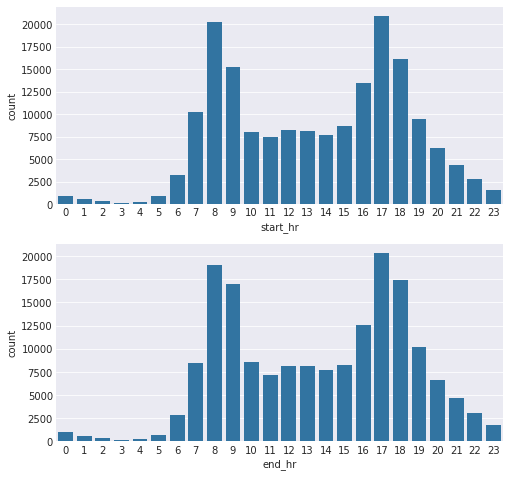

In [19]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'start_hr', color = default_color,  ax = ax[0])
sb.countplot(data = bike, x = 'end_hr', color = default_color, ax = ax[1])

As observed for the days, the 8th, 9th, 17th and 18th hours have the highest trip records. This is expected as it can be linked to morning rush and closing hour from work. 

The 3rd and 4th hours have the least trip records.

In [20]:
# !conda update --all

In [21]:
# !pip show matplotlib

['174938 (99.992%)', '14 (0.008%)']

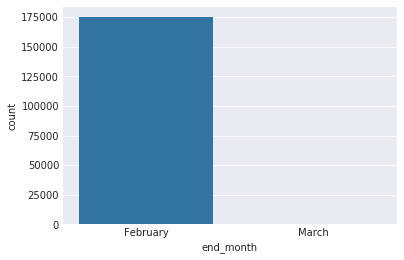

In [22]:
# trip end frequency per day

sb.countplot(x=bike['end_month'],
                   order=bike['end_month'].value_counts(ascending=False).index);
        
abs_values = bike['end_month'].value_counts(ascending=False)
rel_values = bike['end_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.3f}%)' for p in zip(abs_values, rel_values)]
lbls
# ax.bar_label(container=ax.containers[0], labels=lbls)

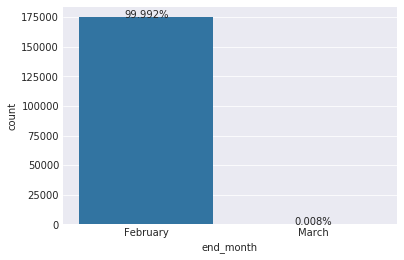

In [23]:
# trip end frequency per day

ax = sb.countplot(data = bike, x = 'end_month',  color=sb.color_palette()[0], order=bike.end_month.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

All the trips started and ended in February except for a very few (14) which ended in March 

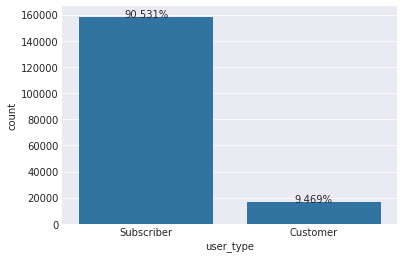

In [24]:
# ride frequency per user type
ax = sb.countplot(data = bike, x = 'user_type',  color=sb.color_palette()[0], order=bike.user_type.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

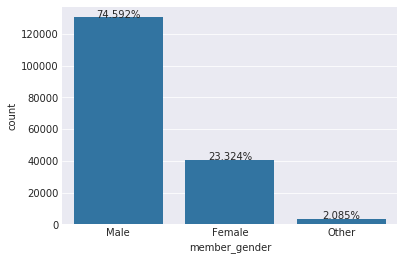

In [25]:
# ride frequency per gender
ax = sb.countplot(data = bike, x = 'member_gender',  color=sb.color_palette()[0], order=bike.member_gender.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

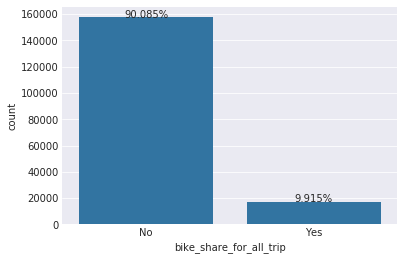

In [26]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = bike, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0],
                  order=bike.bike_share_for_all_trip.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

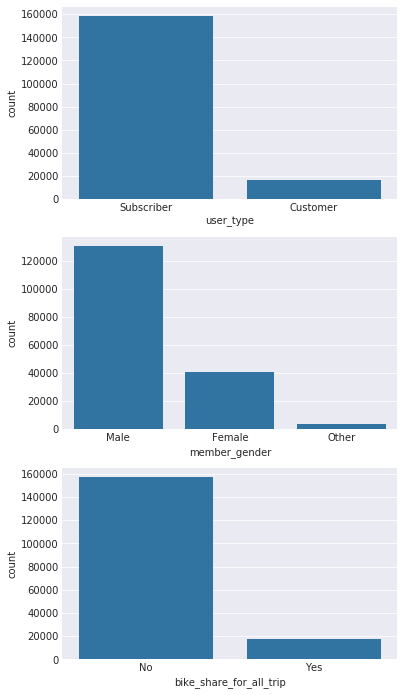

In [27]:
fig, ax = plt.subplots(3,figsize = [6,12])

default_color = sb.color_palette()[0]
sb.countplot(data = bike, x = 'user_type', color = default_color, order=bike.user_type.value_counts().index, ax = ax[0])
sb.countplot(data = bike, x = 'member_gender', color = default_color, order=bike.member_gender.value_counts().index, 
             ax = ax[1])
sb.countplot(data = bike, x = 'bike_share_for_all_trip',  order=bike.bike_share_for_all_trip.value_counts().index,
             color = default_color, ax = ax[2])

There are more of subscribers (about 90%) than normal customers and more non bike sharing for all trip (about 90%) that bike sharing for all trip.

Most of the riders are male (>70%)

## Bivariate Exploration

In [28]:
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day','end_day', 'start_hr', 'end_hr']

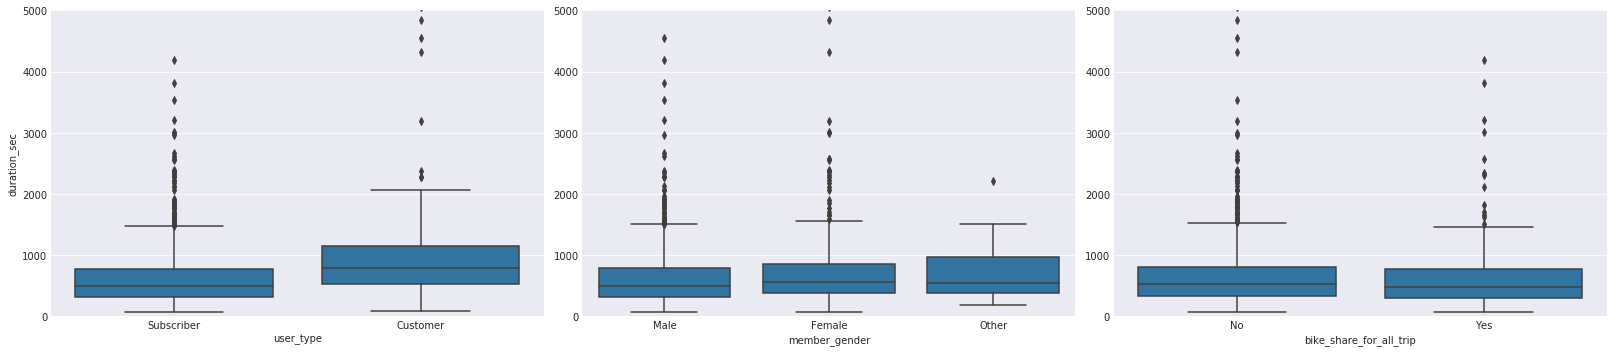

In [29]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(bike.shape[0], 2000, replace = False)
diamonds_samp = bike.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars = ['user_type', 'member_gender', 
                                                                         'bike_share_for_all_trip'],
                size = 5, aspect = 1.5)
g.map(boxgrid)
plt.ylim([0,5000])
plt.show();

It appears that customers spend more time on average compare to subscribers while the female gender spend higher time on average than male.

Bike share for all trip tends to be similar on average across all types .

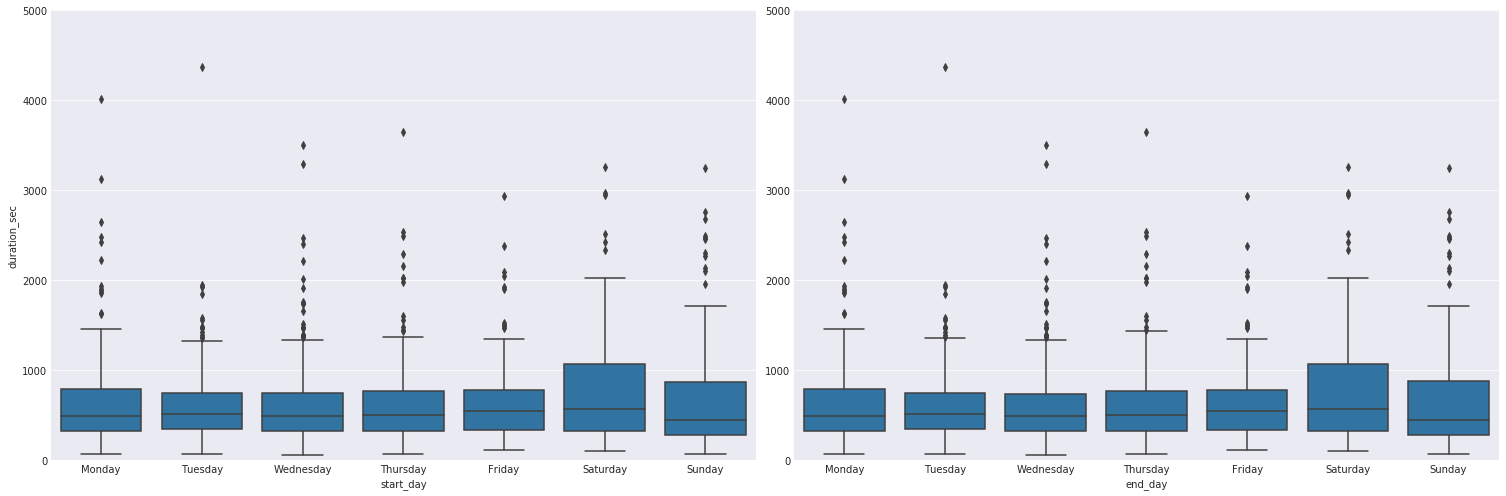

In [30]:
samples = np.random.choice(bike.shape[0], 2000, replace = False)
diamonds_samp = bike.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars = [ 'start_day','end_day'],
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.ylim([0,5000])
plt.show();

Interestingly, it appears that there is a positive relationships between the trip duration and days of the week.

The average trip durations iincreases from monday through Sunday

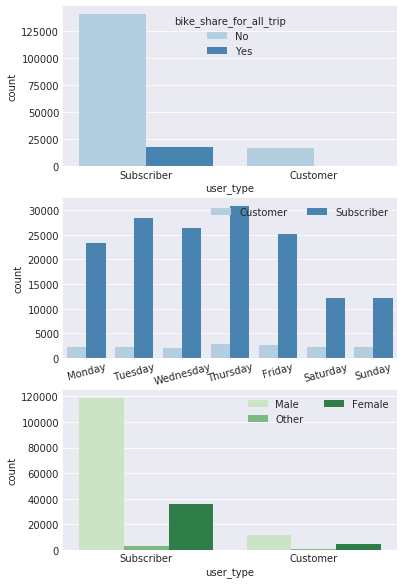

In [31]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [6, 10])

# subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', order=bike.user_type.value_counts().index,
             palette = 'Blues')

# subplot 2: end_day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=15)

# subplot 3: user_type vs. member_gender, 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender',order=bike.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

We can deduce that bike sharing is only available to subscribers and customer type doesn't really affect the number of trips in any week day. 

## Multivariate Exploration


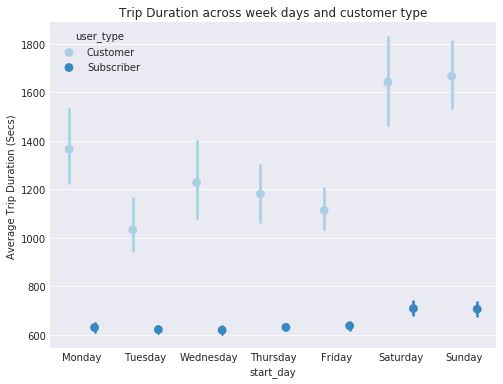

In [32]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

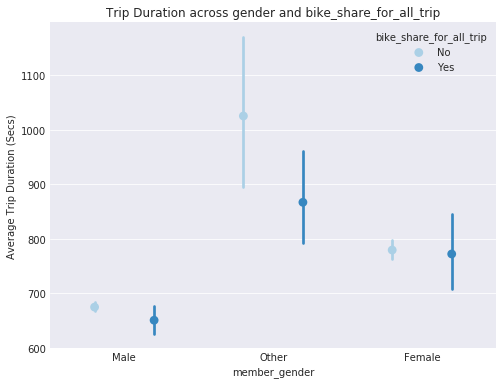

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

The other gender group travels for the longest duration for bike sharing and non bike sharing, followed by female, then, male

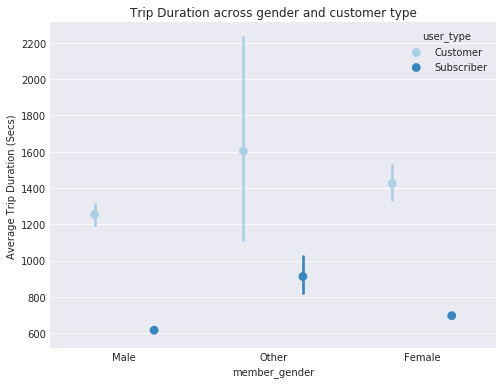

In [34]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

For both subscribers and customers, the other gender group spent most duration followed by female and then malw


## Conclusions
The dataset is just for the months of February and March 2019

The average duration for all trips is about 500 seconds

Most trips were taken on Thursdays and Tuesdays

Weekends have the least trip records

The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

About 90% of the trips were taken by subscribers

Less than 10% of the trips were bike sharing for all trips

Most of the trips were taken by males (>70%)

Customers spend more duration than subscribers

Females spend more duration than males

Trip durations on weekends are longer than on other weekdays

Only subscribers are allowed to share bikes on trips

Customer type doesn't really affect the number of trips per weekday

Customers travel for longer durations regardless of the day of the week as compared to subscribers.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford GoBike System Data Part 1.ipynb'])